<a href="https://colab.research.google.com/github/yeaeunJi/deep_learning-/blob/main/%EA%B2%8C%EC%9D%B4%ED%8A%B8%EA%B0%80_%EC%B6%94%EA%B0%80%EB%90%9C_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 이전에 살펴본 RNN은 순환 경로를 통해 과거의 정보를 기억하는 구조로 단순하여 구현도 쉽게 할 수 있으나 장기 의존 관계(long term, 시간적으로 멀리 떨어진)를 잘 학습하지 못하여 성능이 좋지 못함

- 요즘에는 단순한 RNN보다는 LSTM이나 GRU 계층을 주로 사용하며, RNN이 LSTM을 가리키는 경우도 많음

- 이 LSTM이나 GRU에는 '게이터(gate)'라는 구조가 더해져 있으므로 이 게이트로 시계열 데이터의 장기 의존 관계를 학습할 수 있음

## RNN의 문제점
- 기본적인 RNN을 통해서는 시계열 데이터의 장기 의존 관계를 학습하기 어려움
  - BPTT에서 기울기 소실 혹은 기울기 폭발이 일어나기 때문에 학습이 제대로 이루어지지 않음

- 기울기 소실 : 역전파의 기울기 값이 점점 작아지다가 사라지는 현상
- 기울기 폭발 :기올기 소실과 반대로 매우 큰 수가 되는 현상

### 기울기 소실 또는 기울기 폭발
- 언어 모델 : 주어진 단어들을 기초로 다음에 출현할 단어를 예측

### 기울기 소실과 기울기 폭발의 원인
- RNN 계층의 역전파로 전해진 기울기는 차례대로 'tanh', '+', 'MatMul(행렬곱)' 연산을 통과함
  - + 연산은 상류에서 전해지는 기울기를 그대로 흘려보내므로 기울기는 변하지 않음
  - tanh(x) 연산은 상류에서 전해지는 기울기는 1-y**2로 이 함수의 미분값은 1.0이하로 x가 0으로부터 멀어질수록 작아짐. 즉, 역전파에서 기울기가 tanh 노드를 지날때마다 값은 계속해서 작아진다는 의미
  - RNN 계층의 활성화 함수는 주로 tanh 함수를 사용하는데 이를 RuLU로 바꾸면 기울기 소실을 줄일 수 있음(ReLU 함수는 x를 입력하면 max(0,x)를 출력하므로 x가 0이상이면 역전파 시 상류의 기울기가 그대로 하류에 보내지므로 기울기가 작아지지 않음)
  - 행렬곱 연산은 상류로부터 흘러들어온 기울기 dh*Wh.T로 기울기를 계산하는데, 이때 Wh는 같은 가중치를 사용함

[2.4684068094579303, 3.335704974161037, 4.783279375373183, 6.2795873320876145, 8.080776465019055, 10.25116303229294, 12.9360635066099, 16.276861327786712, 20.454829618345983, 25.688972842084684, 32.25315718048336, 40.48895641683869, 50.824407307019094, 63.79612654485427, 80.07737014308985, 100.51298922051251, 126.16331847536827, 158.3592064825883, 198.77107967611957, 249.495615421267]


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47492 missing from current font.
  font.set_

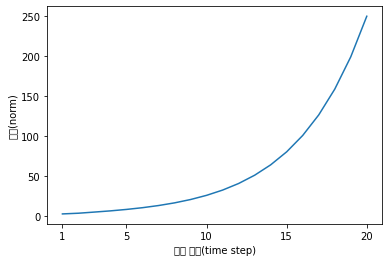

In [2]:
# 역전파 시 기울기는 MatMul 노드를 지날 때마다 어떻게 변하게 될까?
import numpy as np
import matplotlib.pyplot as plt

N = 2 # 미니배치 크기
H = 3 # 은닉 상태 벡터의 차원수
T = 20 # 시계열 데이터의 길이

dh = np.ones((N,H)) # 모든 원소가 1인 행렬
np.random.seed(3) # 재현 가능하도록 난수의 시드 고정
Wh = np.random.randn(H,H)

norm_list = []
for t in range(T) :
  dh = np.matmul(dh, Wh.T)
  norm = np.sqrt(np.sum(dh**2)) / N # 미니배치의 평균 L2 노름(각 원소를 제곱하여 모두 더하고 제곱근을 취한 값)
  norm_list.append(norm)

print(norm_list)

# 그래프 그리기
plt.plot(np.arange(len(norm_list)), norm_list)
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('시간 크기(time step)')
plt.ylabel('노름(norm)')
plt.show()

- 위의 그래프를 보면 기울기의 크기는 시간에 비례하여 지수적으로 증가함
  - 기울기 폭발(exploding gradients)
  - 기울기 폭발이 일어나면 결국 오버플로를 일으키고, NaN(Not a Number)같은 값을 발생시킴

[1.2342034047289652, 0.8339262435402592, 0.5979099219216478, 0.3924742082554759, 0.25252426453184545, 0.16017442237957719, 0.10106299614538984, 0.06358148956166684, 0.039950839098332, 0.025086887541098325, 0.015748611904532892, 0.009884999125204758, 0.006204151282595104, 0.003893806551809953, 0.002443767399386287, 0.0015337065005571367, 0.0009625497320203268, 0.0006040924319556743, 0.00037912574706291117, 0.00023793756048323344]


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47492 missing from current font.
  font.set_

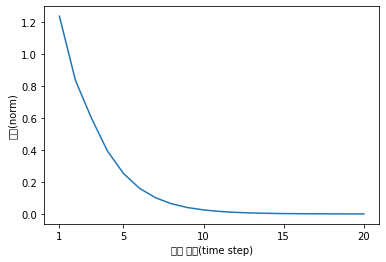

In [4]:
# 역전파 시 기울기는 MatMul 노드를 지날 때마다 어떻게 변하게 될까?
import numpy as np
import matplotlib.pyplot as plt

N = 2 # 미니배치 크기
H = 3 # 은닉 상태 벡터의 차원수
T = 20 # 시계열 데이터의 길이

dh = np.ones((N,H)) # 모든 원소가 1인 행렬
np.random.seed(3) # 재현 가능하도록 난수의 시드 고정
# Wh = np.random.randn(H,H)
# Wh의 초깃값을 다음과 같이 변경 후 다음 실행 진행
Wh = np.random.randn(H,H) * 0.5

norm_list = []
for t in range(T) :
  dh = np.matmul(dh, Wh.T)
  norm = np.sqrt(np.sum(dh**2)) / N # 미니배치의 평균 L2 노름(각 원소를 제곱하여 모두 더하고 제곱근을 취한 값)
  norm_list.append(norm)

print(norm_list)

# 그래프 그리기
plt.plot(np.arange(len(norm_list)), norm_list)
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('시간 크기(time step)')
plt.ylabel('노름(norm)')
plt.show()

- 위의 그래프에서는 기울기 dh가 시간 크기에 비례하여 지수적으로 감소
  - 기울기 소실(vanishing gradients)
  - 기울기 소실 발생 시 기울기가 매우 빠르게 작아지게 되고, 기울기가 일정 수준 이하로 작아지면 가중치 매개변수가 더이상 갱신되지 않게 됨(장기 의존 관계를 학습할 수 없게 됨)

- 이러한 기울기 폭발과 기울기 소실이 일어나는 이유는 Wh를 T번 반복해서 곱하기 때문에 일어남
  - 만약 Wh가 스칼라라면 1보다 크면 지수적으로 증가하고, 1보다 작으면 지수적으로 감소
  - 만약 Wh가 행렬이라면 행렬의 특잇값이 척도가되어 특잇값 중 최댓값이 1보다 크면 지수적으로 증가하고 작으면 지수적으로 감소(반드시 1보다 크다고 일어나는 것을 아님)

  - 행렬의 특잇값 : 데이터가 얼마나 퍼져 있는지를 나타냄 

### 기울기 폭발 대책
- 전통적인 기법으로 기울기 클리핑(gradients clipping)이라는 기법이 있음

In [ ]:
# 기울기 클리핑 구현
import numpy as np

dW1 = np.random.rand(3,3) *  10
dW2 = np.random.rand(3,3) * 10
grads = [dW1, dW2] # 모든 매개변수의 기울기를 한곳에 모음
max_norm = 5.0 # Threashold

def clip_grads(grads, max_norm) :
  total_norm = 0 

  # 기울기에 대한 L2 노름
  for grad in grads :
    total_norm += np.sum(grad ** 2)
  total_norm = np.sqrt(total_norm)

  rate = max_norm / (total_norm + 1e-6)
  if rate < 1 :
    for grad in grads :
      grad *= rate

## 기울기 소실과 LSTM
- RNN 학습에서 기울기 소실은 큰 문제인데 이를 해결하기 위해서는 RNN 계층의 아키텍쳐 수정이 필요함
  - 이때, 게이트가 추가된 RNN이 등장
  - 게이트가 추가된 RNN의 대표로는 LSTM과 GRU가 있음

- LSTM(Long Short-Term Memory) : 단기 기억(short-term memory)를 긴(long) 시간 지속할 수 있음을 의미 

### LSTM의 인터페이스
- RNN과는 다르게 기억셀(memory cell)이 존재하는데 다른 계층이나 외부로 출력되지 않고 LSTM 계층 내에서만 사용됨
  - 기억 셀은 시각 t에서의  LSTM의 기억이 저장되며, 과거 ~ 시각 t까지 필요한 모든 정보를 저장
  - ht는 ct인 기억셀의 값을 tanh()로 변환한 값이며 ct의 각 요소에 tanh()를 적용한 것이 ht이므로 ht와 ct의 원소수는 동일함

- 게이트(gate) : 데이터의 흐름일 제어할 수 있는 문과 같은 역할
  - 0.0(닫은 상태) ~ 1.0(완전 개발)의 값을 취함
  - 시그모이드 함수를 사용하여 게이트의 열림 상태를 구함
  - 열림 상태(openness)를 얼마나 주느냐에 따라 흐리게 할 데이터의 양도 조절 가능
  - 게이트의 열림 상태는 학습 데이터로부터 자동 학습하여 갱신되며, 게이트의 열림 상태를 제어하기 위한 전용 가중치 매개변수 사용

### output 게이트
- tanh(ct)에 게이트를 적용한다면?
  - tanh(ct)의 각 원소에 대해 그것이 다음 시각의 은닉 상태에 얼마나 중요한가를 조정하는 역할

- 다음 은닉 상태 ht의 출력을 담당하는 게이트로 output(출력) 게이트라고 함
- output 게이트의 열림 상태는 다음 몇 %만 흘려보낼지에 대한 것으로 입력 xt와 이전 상태 h(t-1)의 값으로 구함
  - 아마다르 곱(Hadamard Product) : 원소별 곱
  -  sigmoid(xt*wx + h(t-1)*wh + b)

- tanh의 출력은 -1.0 ~ 1.0의 실수를 출력하고, 그 수치는 인코딩된 정보의 강약(정도)를 표시한다고 해석할 수 있음
- sigmoid의 출력은 0.0 ~ 1.0이며 데이터를 얼마만큼 통과시킬지를 정하는 비율을 의미

### forget 게이트
- 기얼셀에서 불필요한 기억을 잊도록 하는 망각 게이트
- sigmoid(xt * wx + h(t-1)*Wh + b)
- ct = f와 c(t-1)의 원소별 곱

### 새로운 기억 셀
- 새로 기억해야 할 정보를 기억하는 셀
- 이전 시각의 기억 셀에 tanh 노드가 계산할 경과가 더해짐
  - 기억 셀에 새로운 정보가 추가된 것임
  - tanh 노드는 게이트가 아니고, 새로운 정보를 추가하는 것이 목적임

### input 게이트
- 기억 셀에 추가된 새로운 정보의 가치가 얼마나 큰지를 판단하는 게이트
- input 게이트에 의해 가중치 정보가 새로 추가되는 것과 비슷
- 새로 추가될 정보와 input로 계산된 값은 원소별 곱하고 이를 기억 셀에 추가

### LSTM의 기울기 흐름
- 기억 셀에만 집중하여 역전파의 흐름을 살펴보면 기억 셀의 역전파에서는 +와 * 만 지나게 되는데, + 노드는 상류에서 전해주는 기울기를 그대로 하류로 전달하므로 기울기 변화가 없음
- * 연산은 원소별 곱으로 계산되고 매 시각 f라는 다른 게이트 값을 이용하여 원소별 곱을 계산하기 때문에 곱셈의 효과가 누적되지 않아 기울기 소실이 일어나기 어려움
- * 연산은 forget 게이트가 제어하고 매 시각 다른 게이트 값을 출력
  - 해당 게이트가 잊어야 한다고 판단한 기억 셀의 원소에 대해서는 기울기가 작아지지만 오래 기억해야 할 정보즤 경우에는 기울기가 약해지지 않을 채 하류로 전해짐
  - 따라서 기억 셀의 기울기가 오래 기억해야할 정보일 경우 소실 없이 전파되리라 기대 가능


In [5]:
class LSTM :
  def __init__(self, Wx, Wh, b) :
    self.params = [Wx, Wh, b] # 해당 매개변수에는 4개의 가주치와 편향이 담겨 있음
    self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
    self.cache = None # 순전파 때 중간 결과를 보관 후 역전파 계산에 사용하는 인스턴스 변수

  def forward(self, x, h_prev, c_prev) :
    Wx, Wh, b = self.params
    N, H = h_perv.shape

    A = np.matmul(x, Wx) + np.matmul(h_prev, Wh) + b

    # slice
    f = A[:, :H]
    g = A[:, H:2*H]
    i = A[:, 2*H:3*H]
    o = A[:, 3*H:]

    f = sigmoid(f)
    g = np.tanh(g)
    i = sigmoid(i)
    o = sigmoid(o)

    c_next = f * c_prev + g * i
    h_next = o * np.tanh(c_next)

    self.cache = (x, h_prev, c_prev, i, f, g, o, c_next)
    return h_next, c_next

  def backward(self, dh_next, dc_next):
    Wx, Wh, b = self.params
    x, h_prev, c_prev, i, f, g, o, c_next = self.cache

    tanh_c_next = np.tanh(c_next)

    ds = dc_next + (dh_next * o) * (1 - tanh_c_next ** 2)

    dc_prev = ds * f

    di = ds * g
    df = ds * c_prev
    do = dh_next * tanh_c_next
    dg = ds * i

    di *= i * (1 - i)
    df *= f * (1 - f)
    do *= o * (1 - o)
    dg *= (1 - g ** 2)

    dA = np.hstack((df, dg, di, do))

    dWh = np.dot(h_prev.T, dA)
    dWx = np.dot(x.T, dA)
    db = dA.sum(axis=0)

    self.grads[0][...] = dWx
    self.grads[1][...] = dWh
    self.grads[2][...] = db

    dx = np.dot(dA, Wx.T)
    dh_prev = np.dot(dA, Wh.T)

    return dx, dh_prev, dc_prev

In [6]:
### Time LSTM 구현
# T개분의 시계열 데이터를 한꺼번에 처리하는 계층
# Truncated BPTT는 역전파의 연결을 적당한 블록으로 끊어서 하지만 순전파의 흐름을 그대로 
# 유지해야 하므로 은닉 상태와 기억 셀을 인스턴스 변수로 유지
class TImeLSTM:
  def __init__(self, Wx, Wh, b, stateful=False) :
    self.parmas [Wx, Wh, b]
    self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
    self.layers = None
    self.h, self.c = None, None 
    self.dh = None
    self.stateful = stateful

  def forward(self, xs) :
    Wx, Wh, b = self.parmas
    N, T, D = xs.shape
    H = Wh.shape[0]

    self.layers = {}
    hs = np.empty((N,T,H), dtype='f')

    if not self.stateful or self.h is None :
      self.h = np.zeros((N,H), dtype='f')
    if not self.stateful or self.c is None :
      self.c = np.zeros((N,H), dtype='f')

    for t in ragne(T):
      layer = LSTM(*self.params)
      self.h, self.c = layer.forward(xs[:, t, :], self.h, self.c)
      hs[:, t, :] = self.h

      self.layers.append(layer)
    
    return hs

  def backward(self, dhs) :
    Wx, wh, b= self.params
    N, T, H = dhs.shape
    D = Wx.shape[0]

    dxs = np.empty((N, T, D), dtype='f')
    dh, dc = 0,0

    grads = [0,0,0]

    for t in reversed(range(T)) :
      layer = self.layers[t]
      dx, dh, dc = layer.backward(dhs[:, t, :] + dh, dc)
      dxs[:, t, :] = dx
      for i, grad in enumerate(layer.grads) :
        grads[i] += grad

    for i, grad in enumerate(grads) :
      self.grads[i][...] = grad
    self.dh = dh
    return dxs

  def set_state(self, h, c=None) :
    self.h, self.c = h,c
  
  def reset_state(self) :
    self.h, self.c = None, None
    


## LSTM을 사용한 언어 모델 구현

In [ ]:
 import pickle

 class Rnnlm :
   def __init__(self, vocab_size=10000, wordvec_size=100, hidden_size=100) :
     V, D, H = vovab_size, wordvec_size, hidden_size
     rn = np.random.randn

    # 가중치 초기화
    embed_W = (rn(V, D) / 100).astype('f') 
    lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
    lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
    lstm_b = np.zeros(4 * H).astype('f')
    affine_W = (rn(H,V) / np.sqrt(H)).astype('f')
    affine_b = np.zeros(V).astype('f')

    # 계층 생성
    self.layers = [
        TimeEmbedding(embed_W),
        TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True),
        TimeAffine(affine_W, affine_b)
    ]

    self.loss_layer = TimeSoftmaxWithLoss()
    self.lstm_layer = self.layers[1]

    # 모든 가중치와 기울기를 리스트에 모음
    self.params, self.grads = [], []
    for layer in self.layers :
      self.params += layer.params
      self.grads += layer.grads

  def predict(self, xs) :
    for layer in self.layers :
      xs = layer.forward(xs)
    return xs

  def forward(self, xs, ts) :
    score = self.predict(xs)
    loss = self.loss_layer.forward(score, ts)
    return loss

  def backward(self, dout=1) :
    dout = self.loss_layer.backward(dout)
    for layer in reversed(self.layers) :
      dout = layer.backward(dout)
    return dout

  def reset_state(self) :
    self.lstm_layer.reset_state()

  def save_params(self, file_name='Rnnlm.pkl') :
    with open(file_name, 'wb') as f :
      pickle.dump(self.params, f)
  
  def load_params(self, file_name='Rnnlm.pkl') :
    with open(file_name, 'rb') as f :
      self.params = pickle.load(f)
      

In [ ]:
# 모델 학습 후 구한 params, grads 
# 기울기 클리핑
# if max_grad is not None :
#   clip_grads(grads, max_grad)
# # 매개변수 갱신
# optimizer.update(params, grads)

## RNNL 추가 개선
### LSTM 계층 다층화
- RNNLM으로 정확한 모델을 만들고자 한다면 많은 경우, LSTM 계층을 깊게 쌓아서 성능을 향상시킬 수 있음
### 드롭아웃에 의한 과적합 억제
- 다층화로 시계열 데이터의 복잡한 의존 관계를 학습한 모델에서 과적합 문제가 일어날 수 있음
- 일반적으로 RNN은 피드포워드 신경망보다 쉽게 과적합을 일으킴

- 과적합 억제 방법
  - 훈련 데이터의 양 늘리기
  - 모델의 복잡도를 줄이기
  - 정규화를 통해 모델의 복잡도에 패널티를 주는 기법(L2 정규화는 가중치가 너무 커지면 패널티를 부과)
  - 드롭 아웃(훈련 시 계층 내의 뉴런 몇 개를 무작위로 무시하고 학습하는 방법)
  - 변형 드롭  아웃(상하방향 + 좌우 방향)
  - 임베딩 계층과 affine 계층 사이의 가중치 공유
  

In [ ]:
### 3가지 개선점
# 1. LSTM 계층의 다층화(2층)
# 2. 드롭아웃 사용(깊이 방향으로만 적용)
# 3. 가중치 공유(Embedding 계층과 Affine 계층에서 가중치 공유)
# 작동되지 않는 코드

import sys
sys.path.append('..')
from common.time_layers import *
from common.np import *
from common.base_model import BaseModel

class BetterRnnlm(BaseModel) :
  def __init__(self, vocab_size=10000, wordvec_size=650,
               hidden_size=650, dropout_ratio=0.5) :
    V, D, H = vocab_size, wordvec_size, hidden_size
    rn = np.random.randn

    embed_W = (rn(V,D) / 100).astype('f')
    lstm_Wx1 = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
    lstm_Wh1 = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
    lstm_b1 = np.zeros(4 * H).astype('f')
    lstm_Wx2 = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
    lstm_Wh2 = (rn(H, 4 * H) / np.sqrt(H)).astype('f') 
    lstm_b2 = np.zeros(4 * H).astype('f')
    affine_b = np.zeros(V).astype('f')

    # 세가지 개선
    self.layers = [
      TimeEmbedding(embed_W),
      TimeDropout(dropout_ratio),
      TimeLSTM(lstm_Wx1, lstm_Wh1, lstm_b1, stateful=True),
      TimeDropout(dropout_ratio),
      TimeLSTM(lstm_Wx2, lstm_Wh2, lstm_b2, stateful=True),
      TimeDropout(dropout_ratio),
      TimeAffine(embed_W.T, affine_b) # 가중치 공유                
    ]

    self.loss_layer = TimeSoftmaxWithLoss()
    self.lstm_layers = [self.layers[2], self.layers[4]]
    self.drop_layers = [self.layers[1], self.layers[3], self.layers[5]]

    self.params, self.grads = [], []

    for layer in self.layers :
      self.params += layer.params
      self.grads += layer.grads
    
  def predict(slef, xs, train_flg=False) :
    for layer in self.drop_layers :
      layer.train_flg = train_flg
    for layer in self.layers :
      xs = layer.forard(xs)
    return xs

  def forward(self, xs, ts, train_flg=True) :
    score = self.predict(xs, train_flg)
    loss = self.loss_layer.forward(score, ts)
    return loss
  
  def backward(self, dout=1) :
    dout = self.loss_layer.backward(dout)
    for layer in reversed(self.layers):
      dout = layer.backward(dout)
    return dout
  
  def reset_state(self) :
    for layer in self.lstm_layers :
      layer.reset_state()

In [ ]:
# 작동되지 않은 코드
# 매 에폭에서 검증 데이터로 퍼플렉서티를 평가하고, 그 값이 나빠졌을 경우에만 학습률을 낮춤
import sys
sys.path.append('..')
from common import config

from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from common.util import eval_perplexity
from dataset import ptb 
from better_rnnlm import BetterRnnlm

# 하이퍼 파라미터 설정
batch_size = 20
wordvec_size = 650
hidden_size = 650
time_size = 35
lr = 20.0
max_epoch = 40
max_grad = 0.25
dropout = 0.5

# 학습 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_val, _, _ = ptb.load_data('val')
corpus_text, _, _ = ptb.load_data('test')

vocab_size = len(word_to_id)
xs = corpus[:-1]
ts = corpus[1:]

model = BetterRnnlm(vocab_size, wordvec_size, hidden_size, dropout)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

best_ppl = float('inf')
for epoch in range(max_epoch) :
  trainer.fit(xs, ts, max_epoch=1, batch_size=batch_size,
              time_size=time_size, max_grad=max_grad)
  
  model.reset_state() # 학습이 끝난 후 테스트 데이터를 사용하여 퍼플렉서티 평가 시 모델 상태를 재설정하여 평가를 수행
  ppl = eval_perplexity(model, corpus_val)

  if best_ppl > ppl :
    bset_ppl = ppl
    model.save_params()
  else :
    lr /=4.0 
    optimizer.lr = lr
  
  model.reset_state()